In [1]:
import pandas as pd

uof = pd.read_csv('final_everything.csv') 

uof.head(40)

C:\Users\Wei Xun\AppData\Local\Temp\ipykernel_8044\2216629077.py:3: DtypeWarning: Columns (38,39,40,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,101,141,181,221,274) have mixed types. Specify dtype option on import or set low_memory=False.
  uof = pd.read_csv('final_everything.csv')


,IncidentDate,IncidentTime,Incident Location: Street/Highway,Incident Location: Public Transport,Incident Location: Retail Premises,"Incident Location: Open ground (e.g. park, car park, field)",Incident Location: Licensed Premises,Incident Location: Sports or Event Stadia,Incident Location: Hospital/A&E (non-mental-health setting),Incident Location: Mental Health Setting,...,SubjectMedProvided,Outcome: Made off/escaped,Outcome: Arrested,Outcome: Hospitalised,Outcome: Detained - Mental Health Act,Outcome: Fatality,Outcome: Other,Outcome: No Further Action,Date,Average Score
0,2023-04-01,00:15:00,No,No,No,No,No,No,No,No,...,NaN,No,No,No,Yes,No,No,No,2023-06-30,0.6275
1,2023-04-01,00:30:00,Yes,No,No,No,No,No,No,No,...,NaN,No,No,No,No,No,No,Yes,2023-06-30,0.5538
2,2023-04-01,01:00:00,No,No,No,No,No,No,Yes,No,...,NaN,No,No,Yes,No,No,No,No,2023-06-30,0.4962
3,2023-04-01,00:30:00,Yes,No,No,No,No,No,No,No,...,NaN,No,Yes,No,No,No,No,No,2023-06-30,0.4750
4,2023-04-01,12:20:00,Yes,No,No,No,No,No,No,No,...,NaN,No,Yes,No,No,No,No,No,2023-06-30,0.4750
5,2023-04-01,02:40:00,No,No,No,No,No,No,No,No,...,NaN,No,No,Yes,No,No,No,No,2023-06-30,0.4938
6,2023-04-01,01:40:00,Yes,No,No,No,No,No,No,No,...,NaN,No,No,No,No,No,No,Yes,2023-06-30,0.4912
7,2023-04-01,01:00:00,No,No,No,No,No,No,Yes,No,...,NaN,No,No,Yes,No,No,No,No,2023-06-30,0.4725
8,2023-04-01,02:40:00,No,No,No,No,No,No,No,No,...,NaN,No,Yes,No,No,No,No,No,2023-06-30,0.6275
9,2023-04-01,01:14:00,Yes,No,No,No,No,No,No,No,...,NaN,No,Yes,No,No,No,No,No,2023-06-30,0.4750


In [2]:
temp = uof[[col for col in uof.columns if col.startswith('Outcome:')]]
yes_percentage = (temp == 'Yes').mean() * 100
print(yes_percentage)

number_of_rows = uof.shape[0]
print("Number of rows:", number_of_rows)

Outcome: Made off/escaped                 0.433090
Outcome: Arrested                        75.988487
Outcome: Hospitalised                     4.124970
Outcome: Detained - Mental Health Act     4.082949
Outcome: Fatality                         0.000339
Outcome: Other                           14.202721
Outcome: No Further Action                6.162773
dtype: float64
Number of rows: 885267


In [3]:
uof = uof[uof['SubjectAge'] != '2017-11-01 00:00:00']

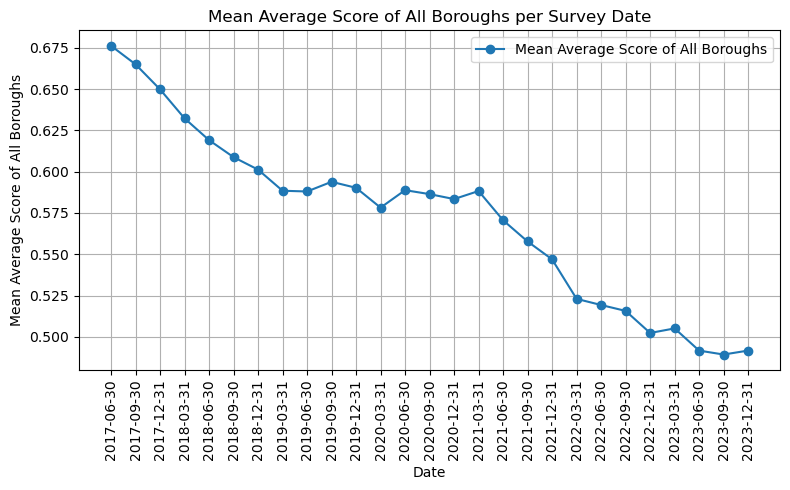

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

date_group = uof.groupby("Date")["Average Score"].mean()
date_group = date_group.sort_index()

plt.figure(figsize=(8, 5))
plt.plot(date_group.index, date_group.values, marker='o', label='Mean Average Score of All Boroughs')



plt.title("Mean Average Score of All Boroughs per Survey Date")
plt.xlabel("Date")
plt.ylabel("Mean Average Score of All Boroughs")
plt.grid(True)
plt.xticks(rotation=90)

plt.legend()
plt.tight_layout()

plt.savefig("mean_average_score_per_survey_date.png")
plt.show()

In [5]:
subject_age_counts = uof['SubjectAge'].value_counts()

# Calculate the percentage of each unique value
subject_age_percentage = (subject_age_counts / uof['SubjectAge'].count()) * 100

print(subject_age_percentage)

SubjectAge
18-34          56.217525
35-49          24.753191
11-17          11.229034
50-64           7.097881
65 and over     0.654284
0-10            0.048086
Name: count, dtype: float64


In [6]:
uof.loc[uof.SubjectAge == '0-10','SubjectAge'] = 'Under18'
uof.loc[uof.SubjectAge == '11-17','SubjectAge'] = 'Under18'

uof.loc[uof.SubjectAge == '50-64','SubjectAge'] = 'Over50'
uof.loc[uof.SubjectAge == '65 and over','SubjectAge'] = 'Over50'

subject_age_counts = uof['SubjectAge'].value_counts()

# Calculate the percentage of each unique value
subject_age_percentage = (subject_age_counts / uof['SubjectAge'].count()) * 100

print(subject_age_percentage)

SubjectAge
18-34      56.217525
35-49      24.753191
Under18    11.277119
Over50      7.752165
Name: count, dtype: float64
